<a href="https://colab.research.google.com/github/Dominika26/classification_tutorials_public/blob/main/Genre_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sb

from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [46]:
tracks = pd.read_csv('genres_v2.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [47]:
tracks.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [48]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [49]:
tracks.shape

(42305, 22)

In [50]:
tracks.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Unnamed: 0
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,20780.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,3.972580,10483.970645
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,0.268342,6052.359519
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000,0.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,4.000000,5255.750000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,4.000000,10479.500000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,4.000000,15709.250000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000,20999.000000


**Histogram**

Na histogramie widać, że mam bardzo nieproporcjonlaną ilość piosenek z różnych gatunków

(array([4578., 5875., 1956., 1680., 1848., 2099.,  461., 3028., 2975.,
        2956., 2999., 2961., 2987., 2966., 2936.]),
 array([ 0.        ,  0.93333333,  1.86666667,  2.8       ,  3.73333333,
         4.66666667,  5.6       ,  6.53333333,  7.46666667,  8.4       ,
         9.33333333, 10.26666667, 11.2       , 12.13333333, 13.06666667,
        14.        ]),
 <a list of 15 Patch objects>)

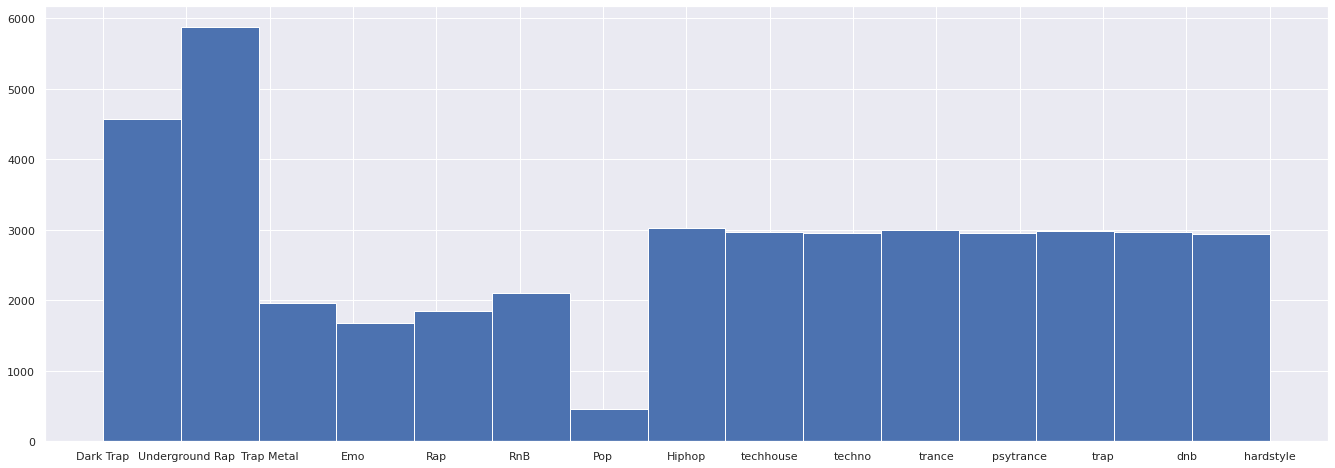

In [51]:
data = tracks['genre']
plt.hist(data, bins = 15)


In [52]:
tracks = tracks.drop(['type', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature', 'song_name', 'Unnamed: 0', 'title'], axis=1)

In [53]:
tracks.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,genre
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,2Vc6NJ9PW9gD9q343XFRKx,Dark Trap
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,7pgJBLVz5VmnL7uGHmRj6p,Dark Trap
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,0vSWgAlfpye0WCGeNmuNhy,Dark Trap
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,0VSXnJqQkwuH2ei1nOQ1nu,Dark Trap
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,4jCeguq9rMTlbMmPHuO7S3,Dark Trap


**Liczba piosenek pochodzących z danego gatunku**

In [54]:
tracks.groupby('genre').size()

genre
Dark Trap          4578
Emo                1680
Hiphop             3028
Pop                 461
Rap                1848
RnB                2099
Trap Metal         1956
Underground Rap    5875
dnb                2966
hardstyle          2936
psytrance          2961
techhouse          2975
techno             2956
trance             2999
trap               2987
dtype: int64

**Średnie cechy dla poszczególnych gatunków**

In [55]:
tracks[['genre', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo' ]].groupby(['genre'], as_index=False).mean().sort_values(by='danceability', ascending=False)

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
11,techhouse,0.786794,0.834481,5.794622,-7.054302,0.567395,0.072255,0.014223,0.580083,0.141387,0.568175,124.927316
7,Underground Rap,0.744658,0.635776,5.059064,-7.362036,0.613617,0.224992,0.162708,0.025280,0.191116,0.444629,152.914521
4,Rap,0.742877,0.620083,5.048701,-6.887086,0.522186,0.217862,0.170566,0.006939,0.181320,0.440921,126.006374
12,techno,0.715742,0.795714,5.698917,-9.290230,0.582544,0.066170,0.039556,0.847089,0.149137,0.192331,128.971052
2,Hiphop,0.698982,0.654418,5.553170,-7.014983,0.527741,0.217150,0.195569,0.017154,0.210581,0.523628,162.980479
3,Pop,0.676807,0.697638,5.399132,-5.632072,0.548807,0.088363,0.149251,0.013831,0.177949,0.550264,152.098937
5,RnB,0.674206,0.598884,5.021915,-6.899896,0.532158,0.143110,0.225276,0.007400,0.178984,0.493974,157.533793
6,Trap Metal,0.647564,0.749157,4.663088,-5.879087,0.717791,0.209677,0.114926,0.057051,0.243655,0.348786,148.684947
0,Dark Trap,0.618834,0.646851,5.298384,-7.998401,0.536479,0.123434,0.159493,0.277276,0.185081,0.273663,149.791186
10,psytrance,0.617462,0.902392,5.989531,-6.703383,0.598446,0.060425,0.006333,0.766458,0.293434,0.259625,142.688529


**Średnie poszczególne cechy i wykresy**

In [56]:
tracks[['genre', 'danceability']].groupby(['genre'], as_index=False).mean().sort_values(by='danceability', ascending=False)

,genre,danceability
11,techhouse,0.786794
7,Underground Rap,0.744658
4,Rap,0.742877
12,techno,0.715742
2,Hiphop,0.698982
3,Pop,0.676807
5,RnB,0.674206
6,Trap Metal,0.647564
0,Dark Trap,0.618834
10,psytrance,0.617462


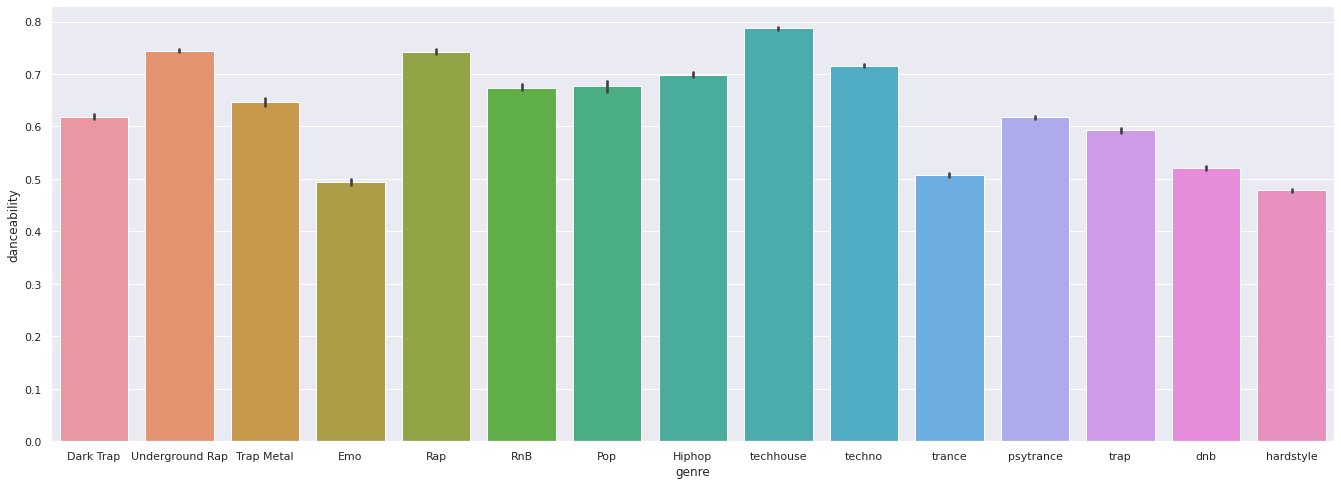

In [57]:
sb.barplot(x = tracks['genre'], y = tracks['danceability'])
sb.set(rc = {'figure.figsize':(23,8)})
# display
plt.show()

In [58]:
tracks[['genre', 'energy']].groupby(['genre'], as_index=False).mean().sort_values(by='energy', ascending=False)

,genre,energy
14,trap,0.906060
10,psytrance,0.902392
9,hardstyle,0.896238
13,trance,0.892435
8,dnb,0.873433
11,techhouse,0.834481
12,techno,0.795714
1,Emo,0.761175
6,Trap Metal,0.749157
3,Pop,0.697638


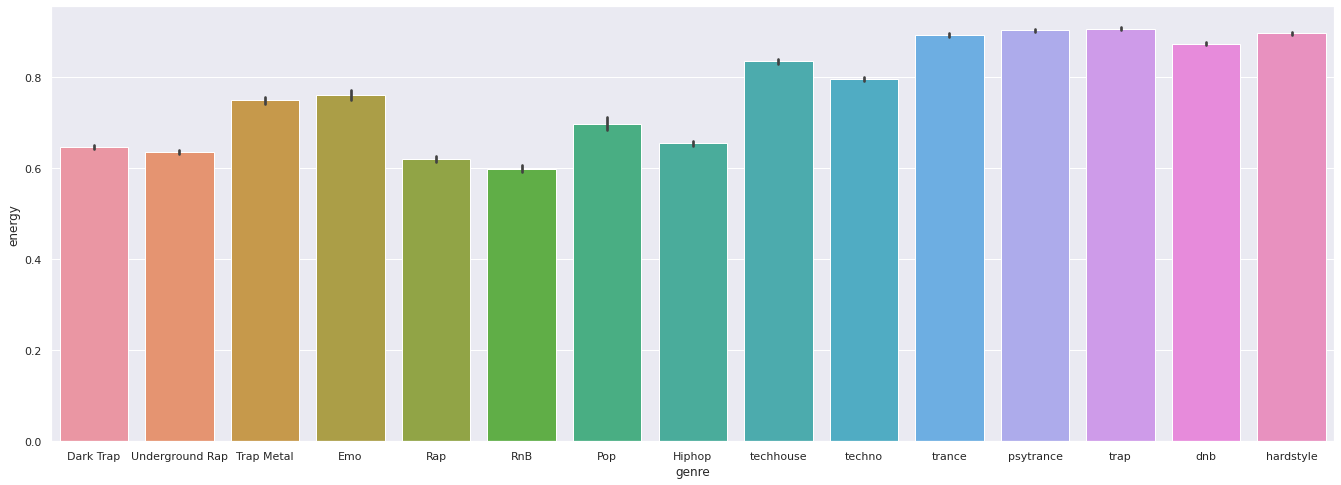

In [59]:
sb.barplot(x = tracks['genre'], y = tracks['energy'])
sb.set(rc = {'figure.figsize':(23,8)})
# display
plt.show()

In [60]:
tracks[['genre', 'key']].groupby(['genre'], as_index=False).mean().sort_values(by='key', ascending=False)

,genre,key
10,psytrance,5.989531
11,techhouse,5.794622
9,hardstyle,5.710831
12,techno,5.698917
8,dnb,5.619016
2,Hiphop,5.553170
3,Pop,5.399132
13,trance,5.389797
0,Dark Trap,5.298384
7,Underground Rap,5.059064


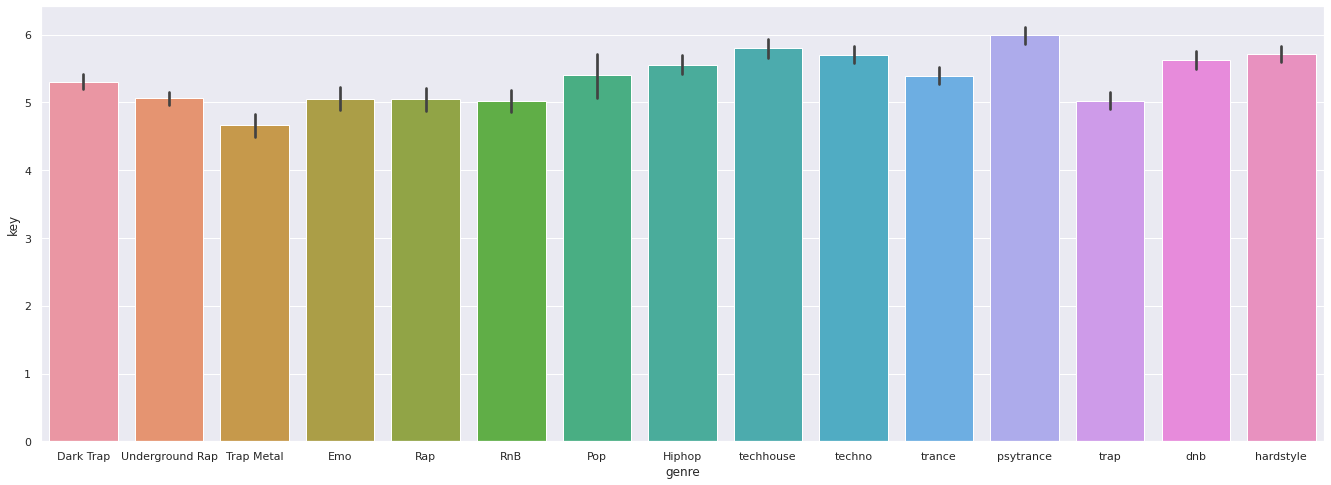

In [61]:
sb.barplot(x = tracks['genre'], y = tracks['key'])
sb.set(rc = {'figure.figsize':(23,8)})
# display
plt.show()

In [62]:
tracks[['genre', 'loudness']].groupby(['genre'], as_index=False).mean().sort_values(by='loudness', ascending=False)

,genre,loudness
14,trap,-2.725578
8,dnb,-4.063237
9,hardstyle,-4.349444
1,Emo,-5.433641
3,Pop,-5.632072
6,Trap Metal,-5.879087
10,psytrance,-6.703383
4,Rap,-6.887086
5,RnB,-6.899896
13,trance,-6.907600


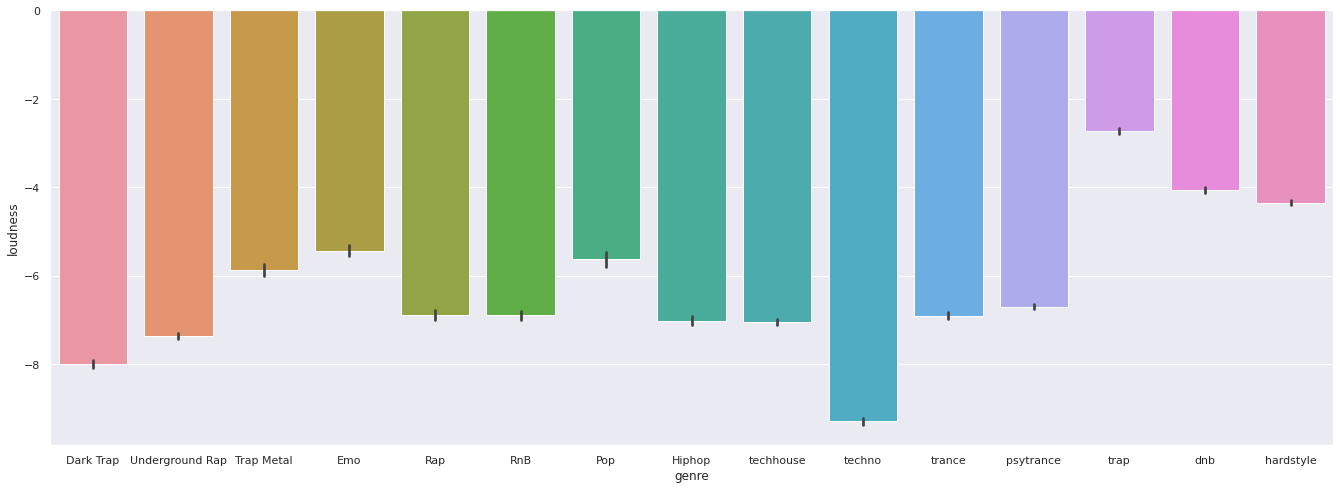

In [63]:
sb.barplot(x = tracks['genre'], y = tracks['loudness'])
sb.set(rc = {'figure.figsize':(23,8)})
# display
plt.show()

In [64]:
tracks[['genre', 'mode']].groupby(['genre'], as_index=False).mean().sort_values(by='mode', ascending=False)

,genre,mode
6,Trap Metal,0.717791
1,Emo,0.685714
7,Underground Rap,0.613617
14,trap,0.603616
10,psytrance,0.598446
12,techno,0.582544
11,techhouse,0.567395
3,Pop,0.548807
0,Dark Trap,0.536479
5,RnB,0.532158


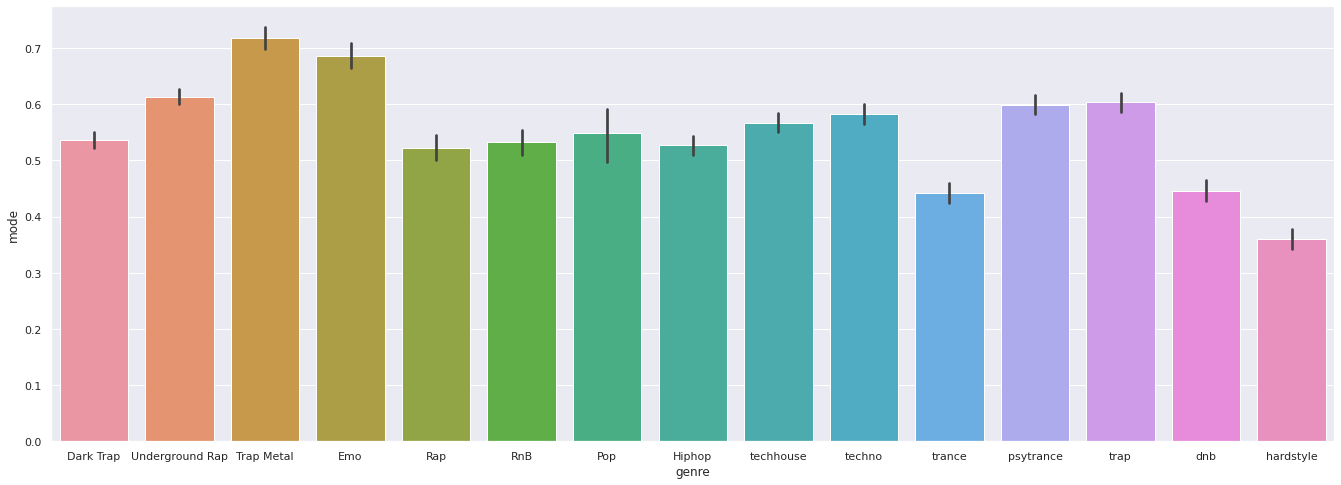

In [65]:
sb.barplot(x = tracks['genre'], y = tracks['mode'])
sb.set(rc = {'figure.figsize':(23,8)})
# display
plt.show()

In [66]:
tracks[['genre', 'speechiness']].groupby(['genre'], as_index=False).mean().sort_values(by='speechiness', ascending=False)

,genre,speechiness
7,Underground Rap,0.224992
4,Rap,0.217862
2,Hiphop,0.217150
6,Trap Metal,0.209677
14,trap,0.205966
5,RnB,0.143110
0,Dark Trap,0.123434
9,hardstyle,0.094624
3,Pop,0.088363
8,dnb,0.083478


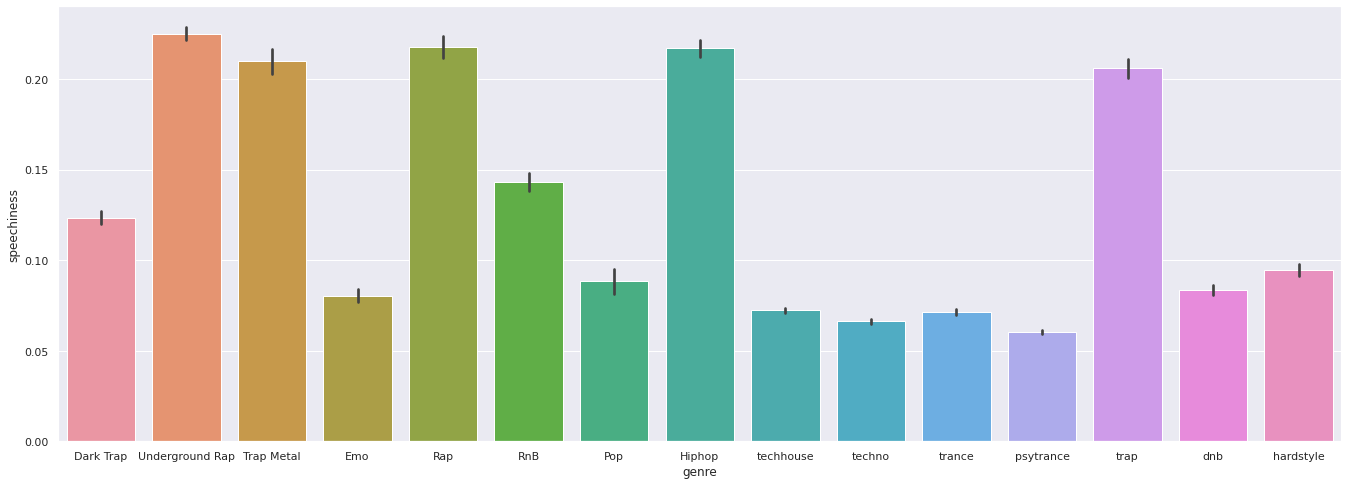

In [67]:
sb.barplot(x = tracks['genre'], y = tracks['speechiness'])
sb.set(rc = {'figure.figsize':(23,8)})
# display
plt.show()

In [68]:
tracks[['genre', 'acousticness']].groupby(['genre'], as_index=False).mean().sort_values(by='acousticness', ascending=False)

,genre,acousticness
5,RnB,0.225276
2,Hiphop,0.195569
4,Rap,0.170566
7,Underground Rap,0.162708
0,Dark Trap,0.159493
3,Pop,0.149251
1,Emo,0.143094
6,Trap Metal,0.114926
9,hardstyle,0.040841
12,techno,0.039556


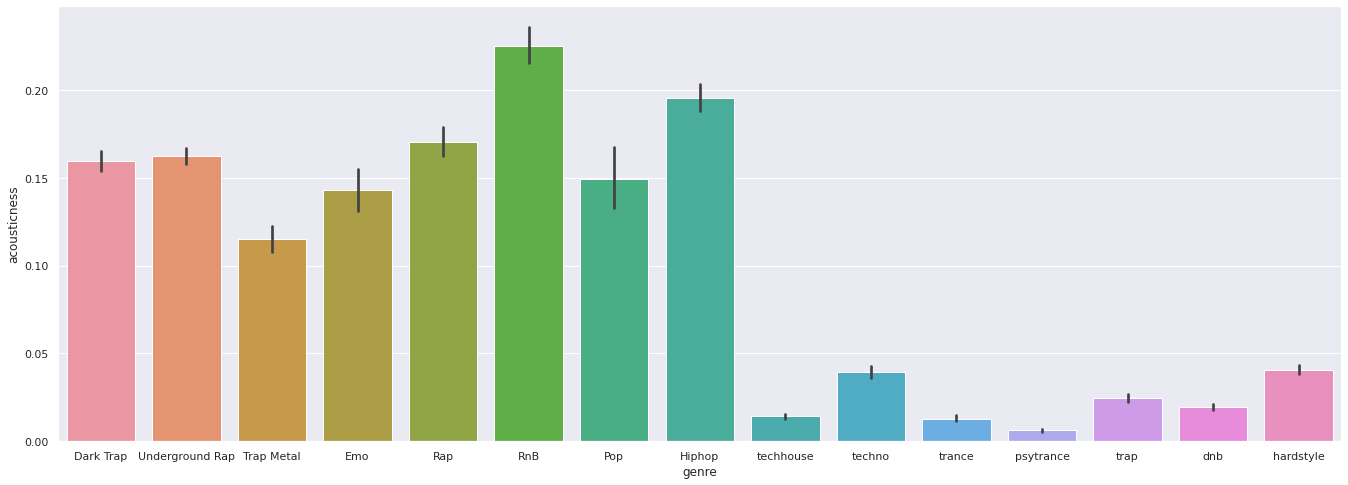

In [69]:
sb.barplot(x = tracks['genre'], y = tracks['acousticness'])
sb.set(rc = {'figure.figsize':(23,8)})
# display
plt.show()

In [70]:
tracks[['genre', 'instrumentalness']].groupby(['genre'], as_index=False).mean().sort_values(by='instrumentalness', ascending=False)

,genre,instrumentalness
12,techno,0.847089
10,psytrance,0.766458
11,techhouse,0.580083
13,trance,0.495374
8,dnb,0.459998
0,Dark Trap,0.277276
14,trap,0.196289
9,hardstyle,0.137431
6,Trap Metal,0.057051
7,Underground Rap,0.025280


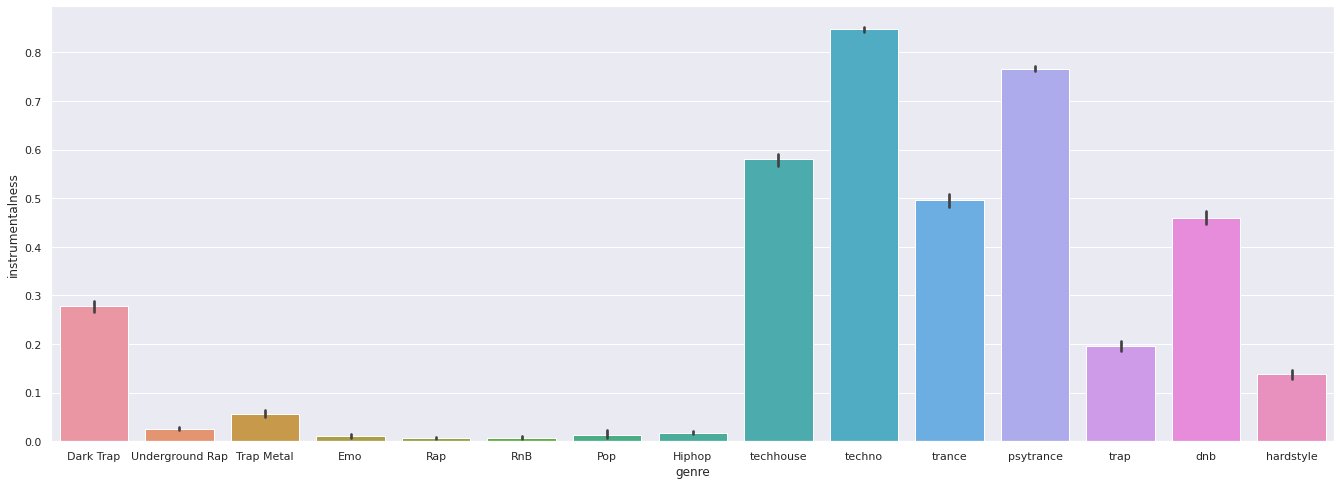

In [71]:
sb.barplot(x = tracks['genre'], y = tracks['instrumentalness'])
sb.set(rc = {'figure.figsize':(23,8)})
# display
plt.show()

In [72]:
tracks[['genre', 'liveness']].groupby(['genre'], as_index=False).mean().sort_values(by='liveness', ascending=False)

,genre,liveness
13,trance,0.296976
10,psytrance,0.293434
14,trap,0.276127
9,hardstyle,0.273830
6,Trap Metal,0.243655
2,Hiphop,0.210581
8,dnb,0.202883
1,Emo,0.195243
7,Underground Rap,0.191116
0,Dark Trap,0.185081


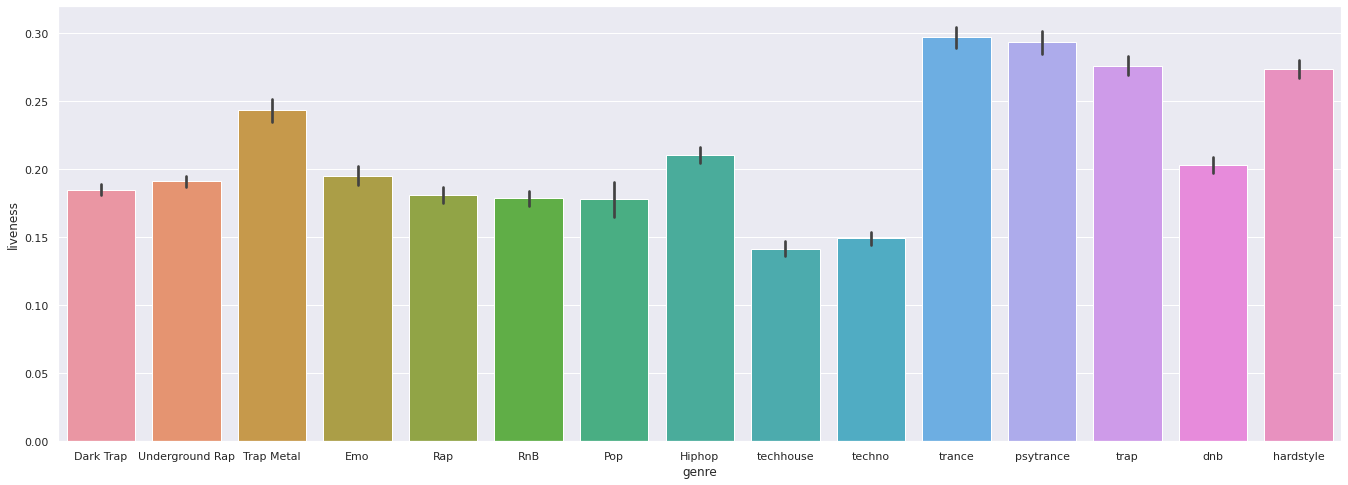

In [73]:
sb.barplot(x = tracks['genre'], y = tracks['liveness'])
sb.set(rc = {'figure.figsize':(23,8)})
# display
plt.show()

In [74]:
tracks[['genre', 'valence']].groupby(['genre'], as_index=False).mean().sort_values(by='valence', ascending=False)

,genre,valence
11,techhouse,0.568175
3,Pop,0.550264
2,Hiphop,0.523628
5,RnB,0.493974
7,Underground Rap,0.444629
1,Emo,0.444145
4,Rap,0.440921
6,Trap Metal,0.348786
14,trap,0.301178
0,Dark Trap,0.273663


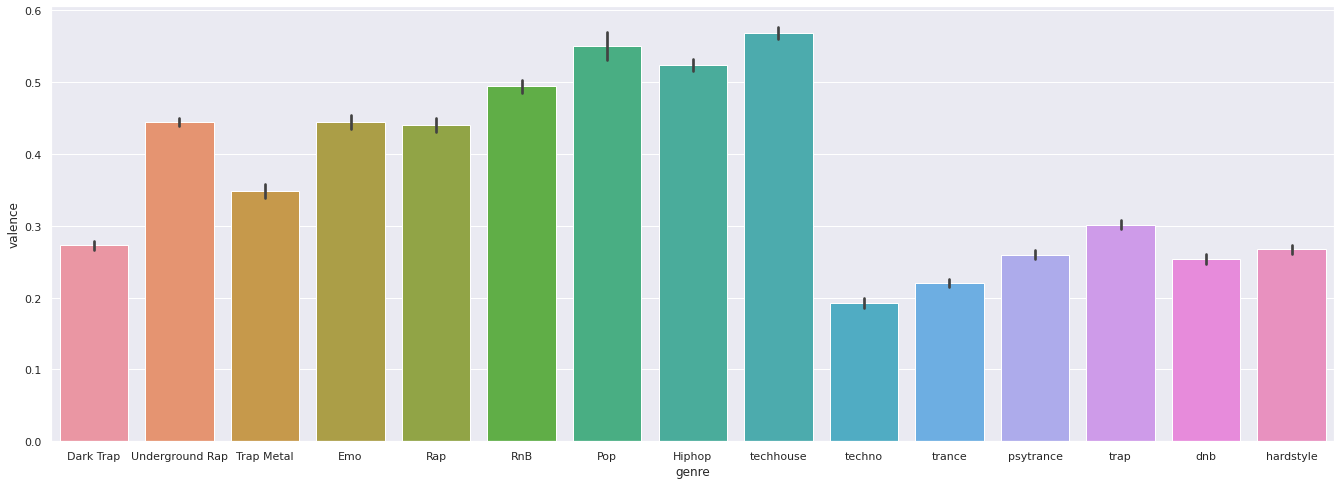

In [75]:
sb.barplot(x = tracks['genre'], y = tracks['valence'])
sb.set(rc = {'figure.figsize':(23,8)})
# display
plt.show()

In [76]:
tracks[['genre', 'tempo']].groupby(['genre'], as_index=False).mean().sort_values(by='tempo', ascending=False)

,genre,tempo
8,dnb,173.849166
2,Hiphop,162.980479
5,RnB,157.533793
1,Emo,153.888640
7,Underground Rap,152.914521
3,Pop,152.098937
9,hardstyle,150.659340
0,Dark Trap,149.791186
6,Trap Metal,148.684947
14,trap,147.691379


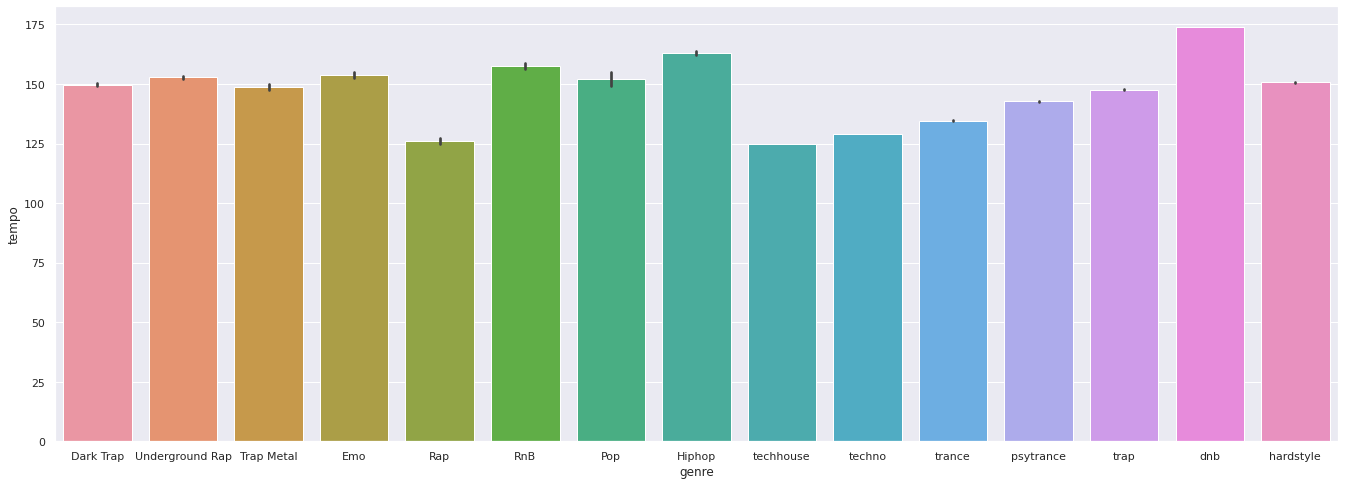

In [77]:
sb.barplot(x = tracks['genre'], y = tracks['tempo'])
sb.set(rc = {'figure.figsize':(23,8)})
# display
plt.show()

**Korealacje między poszczególnymi cechami**

Występuje dosyć silna korelacja między energią a głośnością, ale czy aż tak duża, żeby trzeba było pozbyć się którejś cechy?

In [78]:
corr_metrics = tracks.corr()
corr_metrics.style.background_gradient()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
danceability,1.000000,-0.323248,-0.012708,-0.216776,0.084413,0.182177,0.069910,-0.067114,-0.196702,0.369845,-0.165929
energy,-0.323248,1.000000,0.044731,0.601540,-0.032203,-0.148363,-0.497334,0.303875,0.231754,-0.013520,-0.024504
key,-0.012708,0.044731,1.000000,-0.006810,-0.248283,-0.030634,-0.004937,0.068266,0.002753,0.028600,-0.009862
loudness,-0.216776,0.601540,-0.006810,1.000000,-0.004744,0.048035,-0.283876,-0.187933,0.167104,0.080916,0.151610
mode,0.084413,-0.032203,-0.248283,-0.004744,1.000000,0.050260,-0.014514,-0.016402,0.007280,0.022208,-0.012191
speechiness,0.182177,-0.148363,-0.030634,0.048035,0.050260,1.000000,0.160184,-0.386571,0.057432,0.218829,0.164674
acousticness,0.069910,-0.497334,-0.004937,-0.283876,-0.014514,0.160184,1.000000,-0.261896,-0.107229,0.099328,0.055643
instrumentalness,-0.067114,0.303875,0.068266,-0.187933,-0.016402,-0.386571,-0.261896,1.000000,-0.015990,-0.257068,-0.207667
liveness,-0.196702,0.231754,0.002753,0.167104,0.007280,0.057432,-0.107229,-0.015990,1.000000,-0.025156,0.028327
valence,0.369845,-0.013520,0.028600,0.080916,0.022208,0.218829,0.099328,-0.257068,-0.025156,1.000000,0.058374


**Normilizing the feature data**

In [79]:
#Define our features 
features = tracks.drop(['id', 'genre'], axis=1)

#define our labels 
labels = tracks.genre

#scale the features and set the values to a new variable 
scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(features)

In [80]:
pd.DataFrame(scaled_train_features).head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,1.223608,0.280079,-0.919298,-0.305514,0.905517,2.246552,-0.212853,-0.727231,-0.902637,0.136790,0.398876
1,0.508480,-1.466185,0.717318,-0.259954,0.905517,-0.453057,1.784518,-0.763370,-0.547231,-0.999586,-1.358564
2,1.344924,0.709845,-0.100990,0.572039,0.905517,-0.588592,-0.482135,-0.763359,0.899456,-1.363655,2.959861
3,-1.043093,0.100557,-1.464837,0.596860,0.905517,-0.266002,-0.424181,-0.763370,-0.570013,-0.780887,1.655485
4,1.012900,-0.753535,-0.919298,-0.408876,0.905517,1.239945,0.707390,-0.763370,-0.273841,1.003008,0.021554


**Principal component analysis on scaled data**

Now that we have preprocessed our data, we are ready to use PCA to determine by how much we can reduce the dimensionality of our data. We can use scree-plots and cumulative explained ratio plots to find the number of components to use in further analyses.

Scree-plots display the number of components against the variance explained by each component, sorted in descending order of variance. Scree-plots help us get a better sense of which components explain a sufficient amount of variance in our data. When using scree plots, an ‘elbow’ (a steep drop from one data point to the next) in the plot is typically used to decide on an appropriate cutoff.

Text(0.5, 0, 'Principal component')

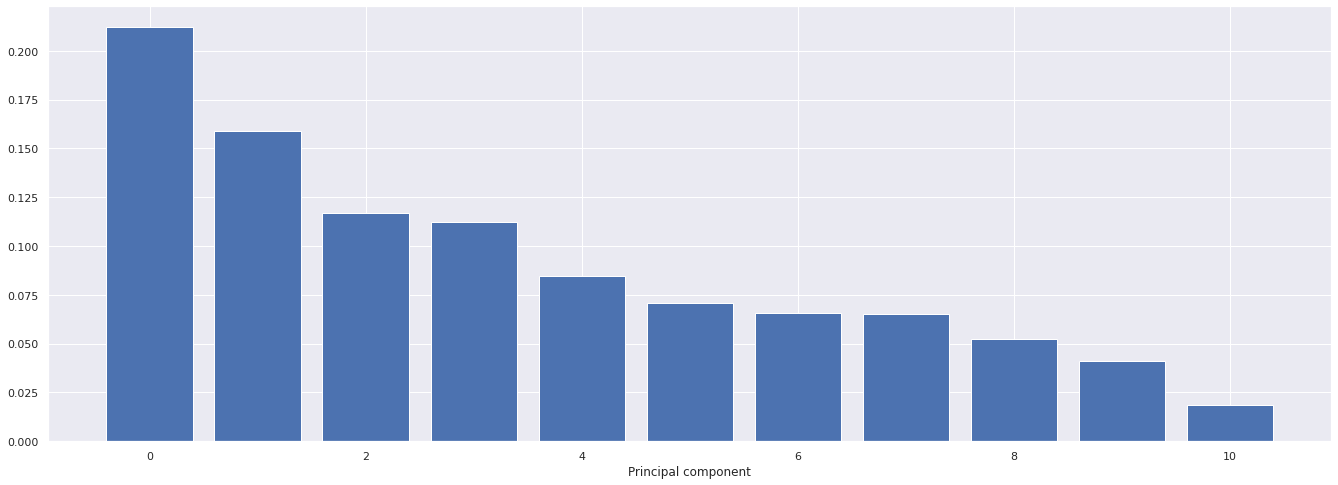

In [81]:
pca = PCA()
pca.fit(scaled_train_features)
exp_variance = pca.explained_variance_ratio_

#plot the explained variance
fig, ax = plt.subplots()
ax.bar(range(pca.n_components_), exp_variance)
ax.set_xlabel('Principal component')

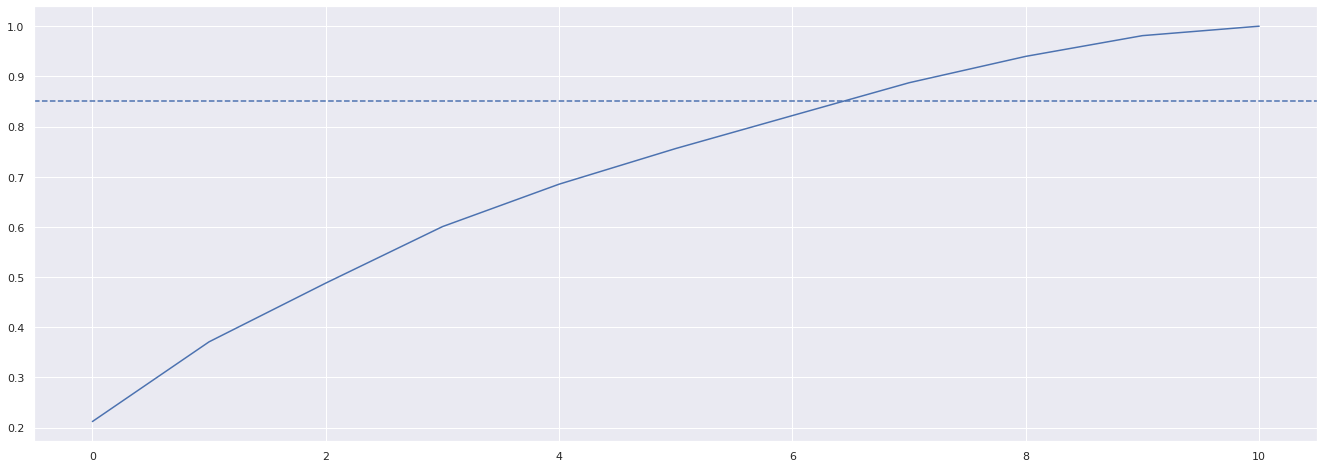

In [82]:
# Calculate the cumulative explained variance 
cum_exp_variance = np.cumsum(exp_variance)

#plot the cumulative explained variance and draw a dashed line at 0.85
fig, ax = plt.subplots()
ax.plot(cum_exp_variance)
ax.axhline(y=0.85, linestyle='--')

# choose the n_components where about 85% of our variance can be explained
n_components = 6

# Perform PCA with the chosen number of components and project data onto components
pca = PCA(n_components, random_state=10)
pca.fit(scaled_train_features)
pca_projection = pca.transform(scaled_train_features)

**Splitting data**

In [83]:
train_features, test_features, train_labels, test_labels = train_test_split(
    pca_projection, labels, random_state=10)

**Decision tree**

In [98]:
#train our decision tree
tree = DecisionTreeClassifier(max_depth=15, random_state=10)
tree.fit(train_features, train_labels)

DecisionTreeClassifier(max_depth=15, random_state=10)

In [99]:
from sklearn.metrics import classification_report
pred_labels_tree = tree.predict(test_features)
class_rep_tree = classification_report(test_labels, pred_labels_tree)

print("Decision Tree: \n", class_rep_tree)


Decision Tree: 
                  precision    recall  f1-score   support

      Dark Trap       0.32      0.28      0.30      1160
            Emo       0.31      0.22      0.26       422
         Hiphop       0.24      0.22      0.23       759
            Pop       0.07      0.04      0.05       111
            Rap       0.31      0.23      0.26       465
            RnB       0.24      0.15      0.18       507
     Trap Metal       0.11      0.07      0.09       488
Underground Rap       0.32      0.49      0.39      1465
            dnb       0.78      0.75      0.77       753
      hardstyle       0.57      0.67      0.61       714
      psytrance       0.62      0.68      0.65       770
      techhouse       0.73      0.69      0.71       750
         techno       0.71      0.68      0.69       758
         trance       0.48      0.52      0.50       736
           trap       0.57      0.54      0.56       719

       accuracy                           0.46     10577
      macro 

In [108]:
from sklearn.model_selection import GridSearchCV

classifier = DecisionTreeClassifier()

params = {'max_depth': np.arange(1, 10),
          'random_state': [10, 20, 30],
         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]}

grid_search = GridSearchCV(classifier, param_grid=params, scoring='accuracy', cv=5)
grid_search.fit(train_features, train_labels)
GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={
                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'random_state': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                              20]},
             scoring='accuracy')
grid_search.best_params_

{'max_depth': 9, 'min_samples_leaf': 7, 'random_state': 10}

In [112]:
#train our decision tree
tree2 = DecisionTreeClassifier(max_depth=9,  min_samples_leaf=7, random_state=10)
tree2.fit(train_features, train_labels)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=7, random_state=10)

Z jakiegoś powodu, po dobraniu parametrów jest gorzej...

In [113]:
from sklearn.metrics import classification_report
pred_labels_tree = tree2.predict(test_features)
class_rep_tree = classification_report(test_labels, pred_labels_tree)

print("Decision Tree: \n", class_rep_tree)

Decision Tree: 
                  precision    recall  f1-score   support

      Dark Trap       0.35      0.25      0.29      1160
            Emo       0.35      0.13      0.19       422
         Hiphop       0.29      0.23      0.26       759
            Pop       0.00      0.00      0.00       111
            Rap       0.56      0.17      0.26       465
            RnB       0.24      0.13      0.17       507
     Trap Metal       0.16      0.03      0.05       488
Underground Rap       0.34      0.65      0.45      1465
            dnb       0.70      0.65      0.67       753
      hardstyle       0.49      0.61      0.54       714
      psytrance       0.53      0.59      0.56       770
      techhouse       0.65      0.61      0.63       750
         techno       0.64      0.71      0.67       758
         trance       0.42      0.46      0.44       736
           trap       0.41      0.53      0.47       719

       accuracy                           0.45     10577
      macro 

**Using cross-validation to evaluate model**


In [86]:
# set up our K-fold cross-validation 
kf = KFold(n_splits=10)

tree = DecisionTreeClassifier(random_state=10)

# train our model using KFold cv 
tree_score = cross_val_score(tree,pca_projection, labels, cv=kf)


# Print the mean of each array of scores
print("Decision Tree:", tree_score)

Decision Tree: [0.03616166 0.11061215 0.11628457 0.06263295 0.05908769 0.17706856
 0.37588652 0.16264775 0.39408983 0.21300236]


**Support vector machines**

In [87]:
svc = SVC()
svc.fit(train_features, train_labels)

pred_labels_svc = svc.predict(test_features)
class_rep_svc = classification_report(test_labels, pred_labels_svc)

print("Decision Tree: \n", class_rep_svc)

Decision Tree: 
                  precision    recall  f1-score   support

      Dark Trap       0.45      0.31      0.37      1160
            Emo       0.42      0.17      0.24       422
         Hiphop       0.36      0.15      0.21       759
            Pop       0.00      0.00      0.00       111
            Rap       0.76      0.23      0.36       465
            RnB       0.31      0.06      0.09       507
     Trap Metal       0.25      0.03      0.05       488
Underground Rap       0.36      0.78      0.49      1465
            dnb       0.75      0.87      0.81       753
      hardstyle       0.57      0.71      0.64       714
      psytrance       0.65      0.76      0.70       770
      techhouse       0.72      0.79      0.75       750
         techno       0.73      0.76      0.74       758
         trance       0.55      0.59      0.56       736
           trap       0.56      0.57      0.57       719

       accuracy                           0.53     10577
      macro 

**Naive Bayes classifier**

In [88]:
gaussian = GaussianNB()
gaussian.fit(train_features, train_labels)

pred_labels_gaus = gaussian.predict(test_features)
class_rep_gaus = classification_report(test_labels, pred_labels_gaus)

print("Decision Tree: \n", class_rep_gaus)

Decision Tree: 
                  precision    recall  f1-score   support

      Dark Trap       0.37      0.32      0.34      1160
            Emo       0.04      0.00      0.00       422
         Hiphop       0.32      0.13      0.19       759
            Pop       0.00      0.00      0.00       111
            Rap       0.39      0.33      0.36       465
            RnB       0.34      0.03      0.05       507
     Trap Metal       0.18      0.03      0.06       488
Underground Rap       0.37      0.63      0.47      1465
            dnb       0.61      0.63      0.62       753
      hardstyle       0.42      0.62      0.50       714
      psytrance       0.52      0.61      0.56       770
      techhouse       0.59      0.66      0.63       750
         techno       0.58      0.73      0.65       758
         trance       0.42      0.34      0.38       736
           trap       0.36      0.53      0.43       719

       accuracy                           0.44     10577
      macro 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Random forest**

In [115]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_features, train_labels)

pred_labels_forest = random_forest.predict(test_features)
class_rep_forest = classification_report(test_labels, pred_labels_forest)

print("Decision Tree: \n", class_rep_forest)

Decision Tree: 
                  precision    recall  f1-score   support

      Dark Trap       0.36      0.32      0.34      1160
            Emo       0.52      0.30      0.38       422
         Hiphop       0.27      0.22      0.25       759
            Pop       0.25      0.05      0.08       111
            Rap       0.37      0.30      0.33       465
            RnB       0.27      0.16      0.20       507
     Trap Metal       0.12      0.06      0.08       488
Underground Rap       0.31      0.46      0.37      1465
            dnb       0.80      0.88      0.84       753
      hardstyle       0.66      0.75      0.70       714
      psytrance       0.69      0.76      0.72       770
      techhouse       0.75      0.80      0.78       750
         techno       0.73      0.74      0.74       758
         trance       0.57      0.62      0.60       736
           trap       0.66      0.67      0.67       719

       accuracy                           0.52     10577
      macro 

Grid search

In [118]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(4, 10),
     'min_samples_leaf': [4,5,6,7,8,9,10],
     'n_estimators': [100]  #pozwala ustalić liczbę drzew w lesie, tutaj podaję tylko jeden, ale mogę więcej
}

grid_search = GridSearchCV(random_forest, param_grid=param_grid, n_jobs=1, scoring='accuracy', cv=5)
grid_search.fit(train_features, train_labels)
GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100]},
             scoring='accuracy')
grid_search.best_params_

KeyboardInterrupt: ignored

In [90]:
submission = pd.DataFrame({
    "Genre": pred_labels_forest
})

In [91]:
submission.head()

,Genre
0,Underground Rap
1,Dark Trap
2,techhouse
3,Underground Rap
4,Hiphop
